Process edges for testing:
- Take in line data from Luis' team
- Translate and rotate

Tests in scope:
- Smoothed inflection point detection
- Downsampling + direct vector comparison
-

Set up basic test data:

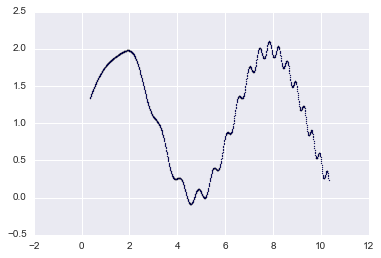

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

SMOOTHING_FACTOR = 30

X = np.arange(0,10,0.01)+0.34
Y = np.sin(X) + 0.1 * np.sin(X**2+3) + 1
testdata = np.array([X,Y]).T
plt.scatter(testdata[:,0],testdata[:,1], s=1)

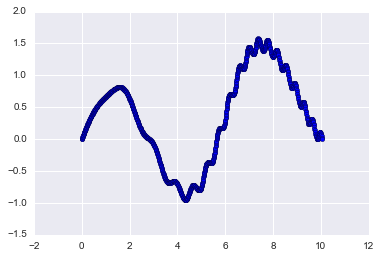

In [29]:
def axis_align(inputdata):
    # Translate leftermost point to the origin
    translateddata = inputdata - inputdata[0]
    
    # Find an assumed "straight edge" line: 
    # straight line between first and last points
    leftpoint = translateddata[0]
    rightpoint = translateddata[-1]
    slope = (rightpoint[1] - leftpoint[1]) / (rightpoint[0] - leftpoint[0])
    
    # NOTE: can we get c,s more smartly?
    theta = np.arctan(slope)
    c, s = np.cos(theta), np.sin(theta)
    rotationmatrix = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    
    newdata =  translateddata * rotationmatrix
    plt.scatter(newdata[:,0], newdata[:,1])
    
    return newdata
    
aligned_data = axis_align(testdata)

We have processed lines.

Find locations of juts by smoothing locally (keep as variable smoothing parameter for now)

[ 1.55013396  4.33014179  4.73873855  4.80273828  7.41392241]


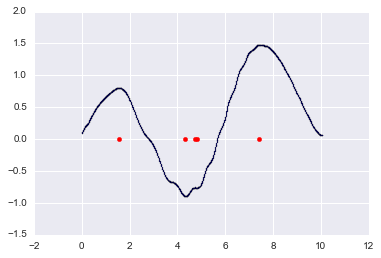

In [30]:
def _kernel_smoother(linedata, pointref, d):
    # Return the smoothed value of f(linedata[pointref])
    
    # Kernel average smoother: take the d nearest points on either side and use their f values
    # as a weighted average for f(x).
    leftlim = max(0, pointref - d)
    rightlim = min(len(linedata), pointref + d)

    weightwindow = np.concatenate( [np.array([(i+1) for i in range(pointref-leftlim)]),
                                   np.array([(d-i) for i in range(rightlim-pointref)])])
    weightwindow = weightwindow / np.sum(weightwindow)
    
    #print(np.sum(weightwindow)
    vals = linedata[leftlim: rightlim][:,1]
    #print(vals.shape, weightwindow.shape)
    #print(vals)
    fx = np.sum(np.multiply(np.squeeze(vals), weightwindow))
    #print(fx)
    return fx

def smooth(linedata):
    Xsmooth = np.array(linedata[:,0]).flatten()
    Ysmooth = [_kernel_smoother(linedata, i, SMOOTHING_FACTOR) for i in range(len(linedata))]
    testdata = np.array([Xsmooth, Ysmooth]).T
    return testdata

def inflection_anal(linedata):
    smoothed = smooth(linedata)
    gradients = np.gradient(smoothed[:,1])

    inflectionmask = [(gradients[i] * gradients[i+1] <= 0) for i in range(len(gradients)-1)]
    
    inflectionrefs = [i for i in range(len(inflectionmask)) if inflectionmask[i]]
    inflectionpoints = smoothed[inflectionrefs,0]
    
    return inflectionrefs, inflectionpoints

smoothed_data = smooth(aligned_data)
inflectionrefs, inflectionpoints = inflection_anal(aligned_data)
print(inflectionpoints)
plt.scatter(smoothed_data[:,0], smoothed_data[:,1], s=1)
plt.scatter(inflectionpoints,[0]*len(inflectionpoints), color='r')


In [31]:
HELLO HELLO




SyntaxError: invalid syntax (<ipython-input-31-5526ab3c6f69>, line 1)